In [3]:
import sys
import yaml
from pprint import pprint
import json
import argparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from kneed import KneeLocator
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA


In [4]:
Spotify_data = pd.read_csv('Spotify_Dataset_V3.csv', delimiter=';')
Spotify_data_noduplicates = Spotify_data.groupby(['Title']).first().reset_index()

In [5]:
features_columns = [
    'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']


non_features_columns = [
    'Title', 'Rank', 'Artists', 'Date', '# of Artist', 'Artist (Ind.)',
    '# of Nationality', 'Nationality', 'Continent', 'Points (Total)',
    'Points (Ind for each Artist/Nat)', 'id', 'Song URL']

features_data = Spotify_data_noduplicates[features_columns]
features_data

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence
0,0.488,0.670,-5759.0,0.027,0.097,0.0,0.484
1,0.725,0.543,-6311.0,0.084,0.030,0.0,0.693
2,0.783,0.522,-6229.0,0.390,0.029,0.0,0.235
3,0.774,0.507,-6952.0,0.065,0.064,0.0,0.508
4,0.813,0.670,-8661.0,0.335,0.200,0.0,0.380
...,...,...,...,...,...,...,...
7452,0.416,0.528,-10348.0,0.291,0.178,0.0,0.203
7453,0.576,0.446,-10103.0,0.044,0.773,0.4,0.060
7454,0.786,0.748,-7568.0,0.162,0.267,0.0,0.562
7455,0.574,0.935,-2783.0,0.093,0.112,0.0,0.836


In [6]:
scaler = MinMaxScaler()

In [7]:
Spotify_data_noduplicates_scaled = Spotify_data_noduplicates

Spotify_data_noduplicates_scaled[features_columns] = scaler.fit_transform (features_data)


In [8]:
features_data_scaled = Spotify_data_noduplicates_scaled[features_columns]
features_data_scaled

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence
0,0.455044,0.671039,0.798021,0.005297,0.097586,0.00000,0.481092
1,0.714912,0.542886,0.782681,0.065678,0.030181,0.00000,0.700630
2,0.778509,0.521695,0.784960,0.389831,0.029175,0.00000,0.219538
3,0.768640,0.506559,0.764868,0.045551,0.064386,0.00000,0.506303
4,0.811404,0.671039,0.717374,0.331568,0.201207,0.00000,0.371849
...,...,...,...,...,...,...,...
7452,0.376096,0.527750,0.670492,0.284958,0.179074,0.00000,0.185924
7453,0.551535,0.445005,0.677301,0.023305,0.777666,0.41841,0.035714
7454,0.781798,0.749748,0.747749,0.148305,0.268612,0.00000,0.563025
7455,0.549342,0.938446,0.880725,0.075212,0.112676,0.00000,0.850840


# Agglomerative

In [9]:
features_matrix = features_data_scaled.to_numpy()
features_matrix

array([[0.45504386, 0.67103935, 0.79802134, ..., 0.09758551, 0.        ,
        0.48109244],
       [0.71491228, 0.54288597, 0.78268119, ..., 0.03018109, 0.        ,
        0.70063025],
       [0.77850877, 0.52169526, 0.78495998, ..., 0.02917505, 0.        ,
        0.21953782],
       ...,
       [0.78179825, 0.74974773, 0.747749  , ..., 0.26861167, 0.        ,
        0.56302521],
       [0.54934211, 0.93844601, 0.88072477, ..., 0.11267606, 0.        ,
        0.85084034],
       [0.48135965, 0.53178607, 0.76850823, ..., 0.12676056, 0.        ,
        0.26995798]])

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

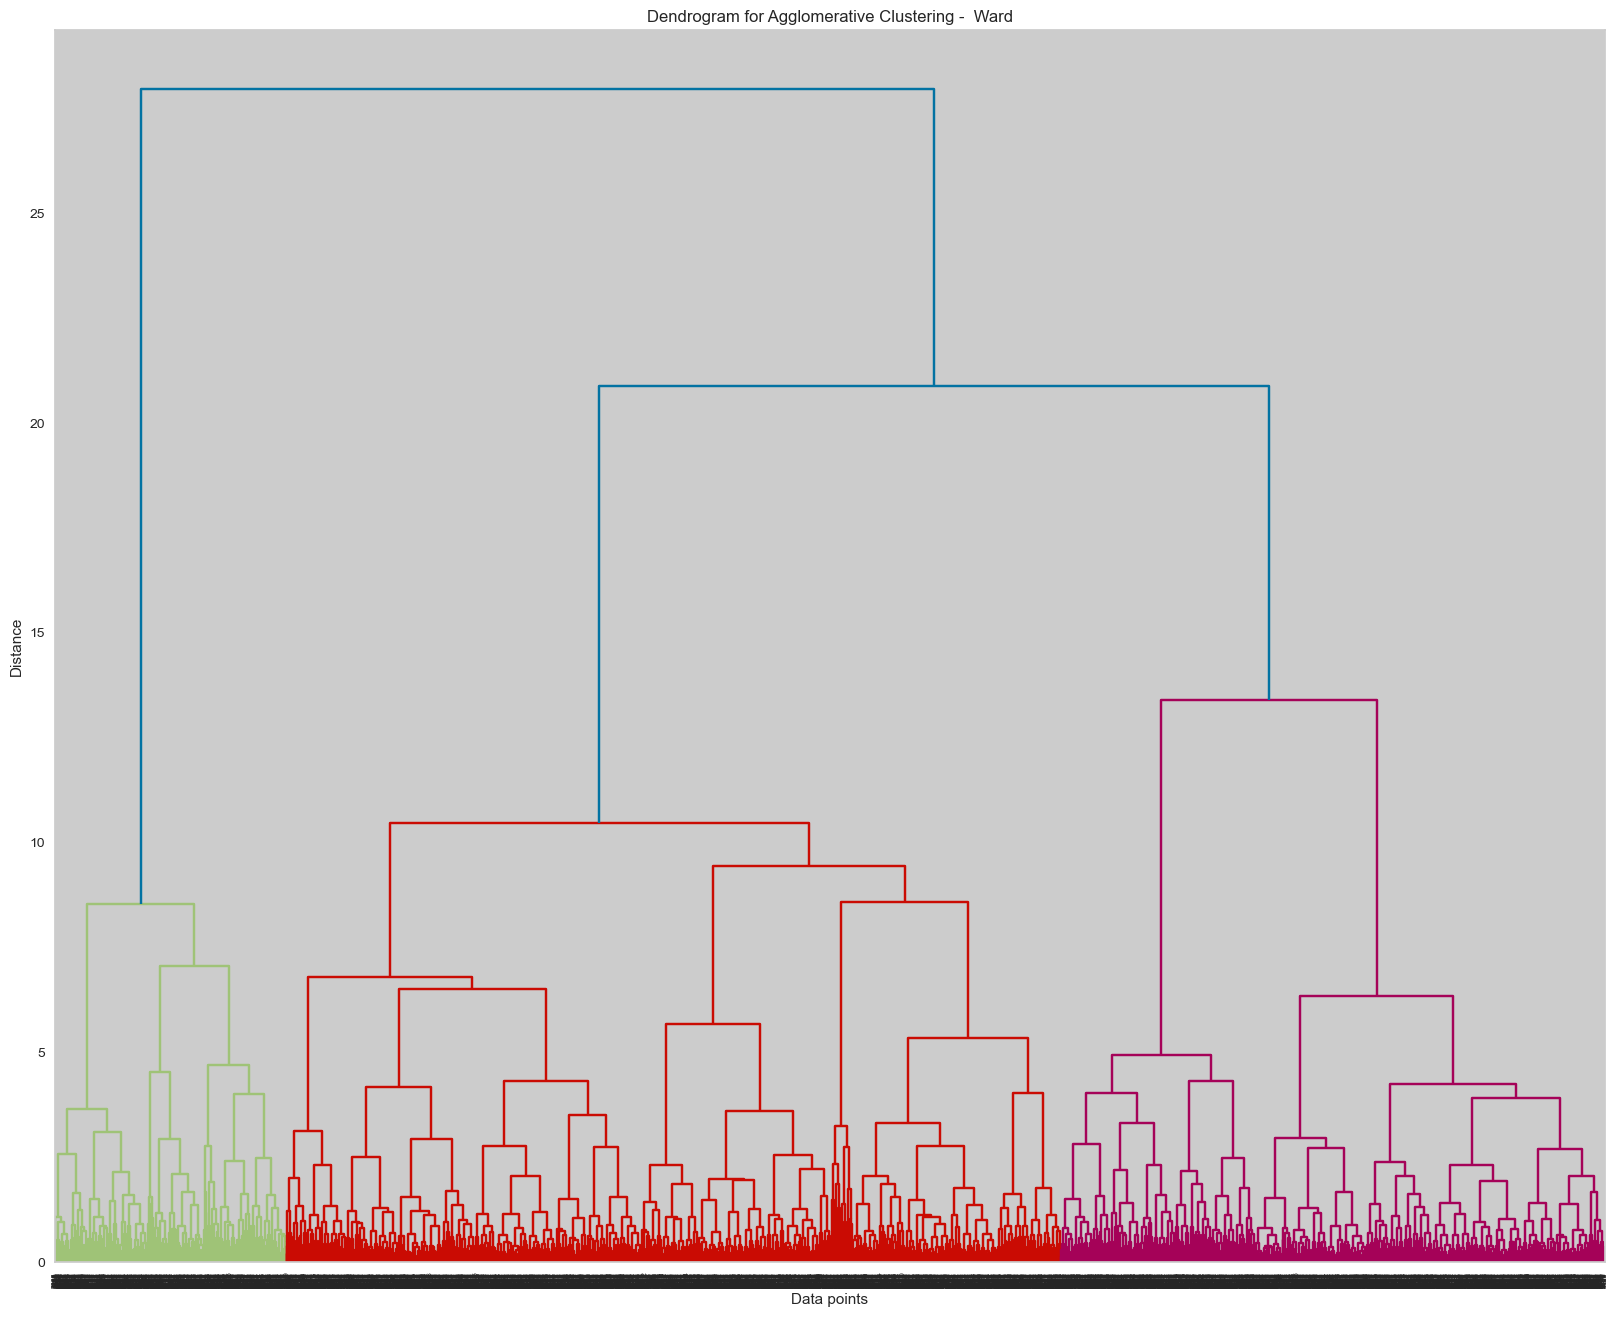

In [11]:
linkage_matrix_ward = linkage(features_matrix, method='ward')

plt.figure(figsize=(20, 16))
dendrogram(linkage_matrix_ward)
plt.title('Dendrogram for Agglomerative Clustering -  Ward')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

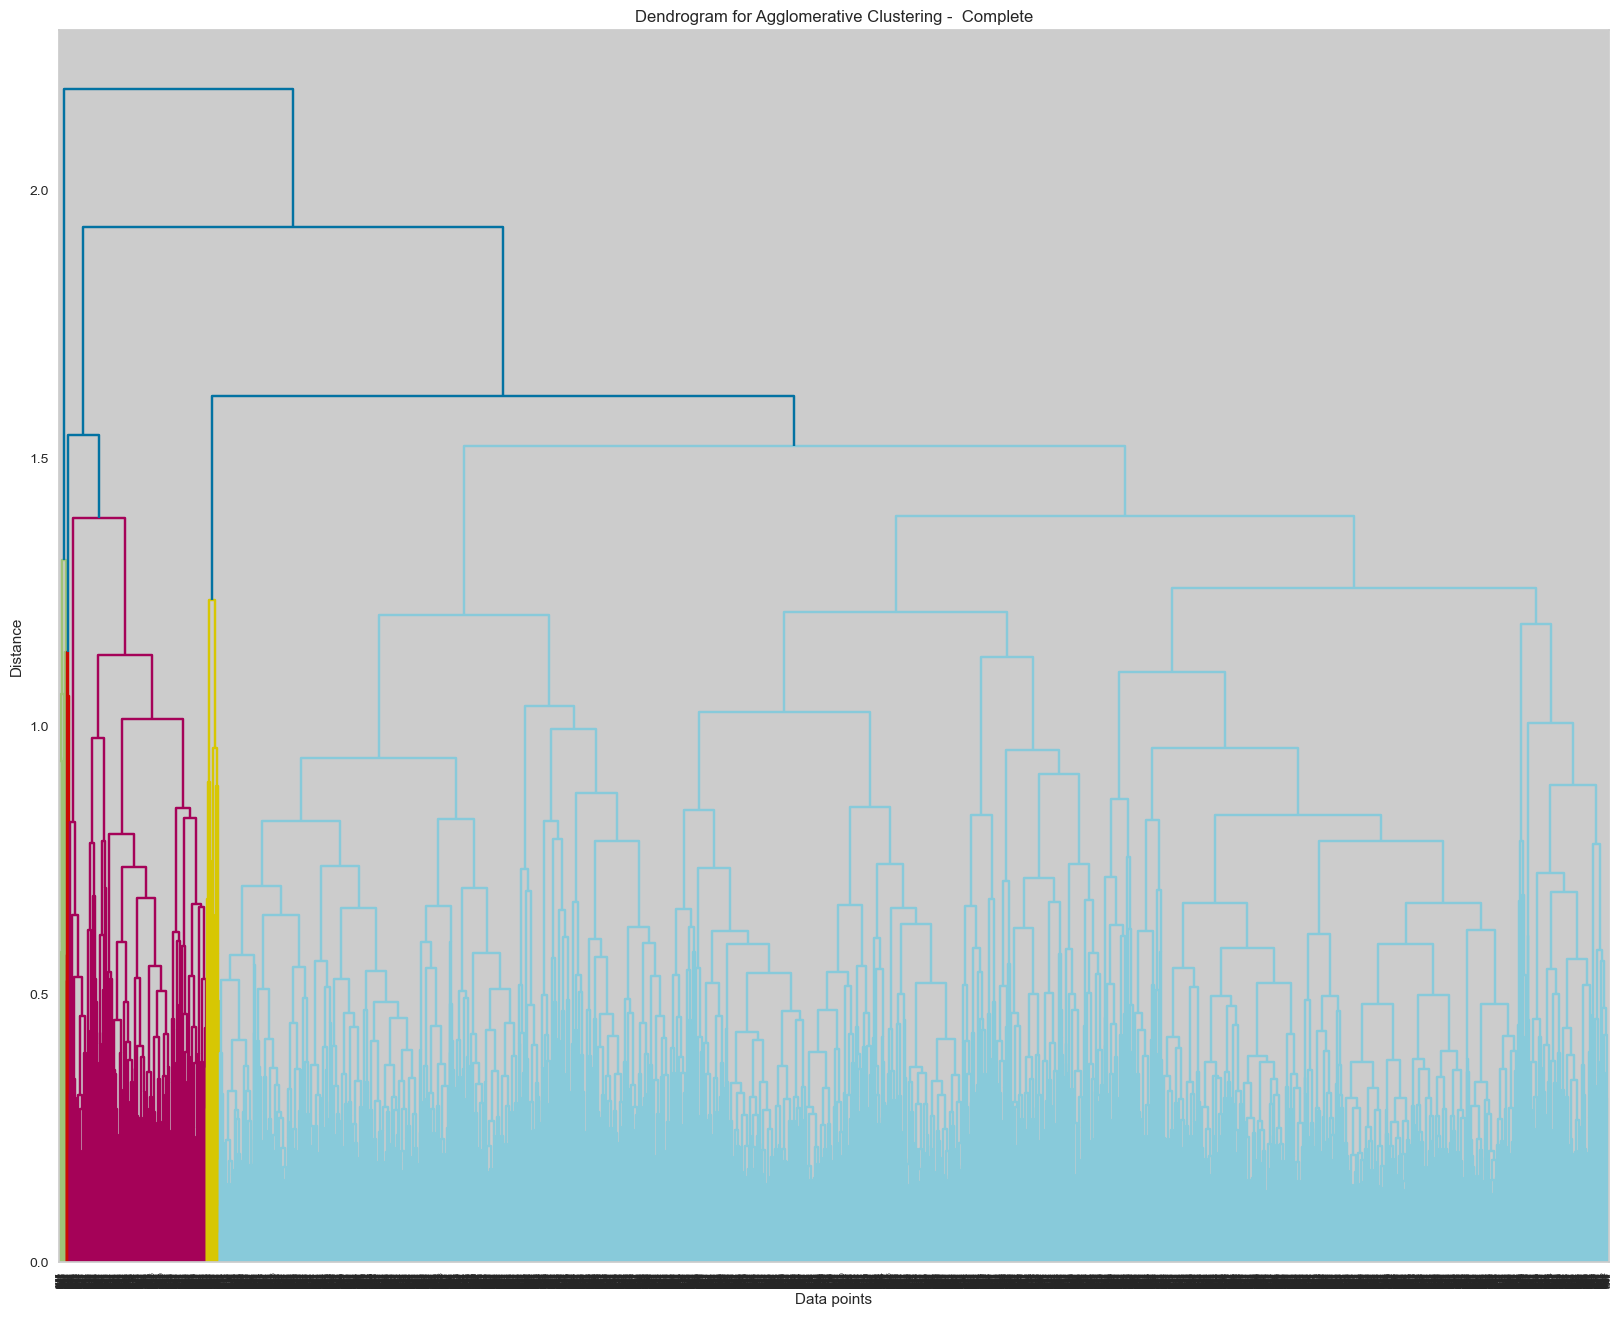

In [12]:
linkage_matrix_complete = linkage(features_matrix, method='complete')
plt.figure(figsize=(20, 16))
z=dendrogram(linkage_matrix_complete)
plt.title('Dendrogram for Agglomerative Clustering -  Complete')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

